In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install requests

# Dataset generation:

cooking: https://cooking.stackexchange.com/ , https://www.reddit.com/r/AskCulinary/,

philosophy: https://philosophy.stackexchange.com/ , https://www.reddit.com/r/askphilosophy/

history: https://history.stackexchange.com/ , https://www.reddit.com/r/AskHistorians/

literature: https://mythology.stackexchange.com/ , https://literature.stackexchange.com/ , https://writing.stackexchange.com/ , https://ebooks.stackexchange.com/ , https://worldbuilding.stackexchange.com/ , https://www.reddit.com/r/literature/ , https://www.reddit.com/r/AskLiteraryStudies/

politics: https://politics.stackexchange.com/ , https://www.reddit.com/r/Ask_Politics/ , https://www.reddit.com/r/PoliticalDiscussion/ , https://www.reddit.com/r/AskALiberal/ , https://www.reddit.com/r/AskTrumpSupporters/ , https://www.reddit.com/r/AskFeminists/

religion: https://buddhism.stackexchange.com/ , https://hinduism.stackexchange.com/ , https://islam.stackexchange.com/ , https://christianity.stackexchange.com/ , https://www.reddit.com/r/DebateReligion/ , https://www.reddit.com/r/religion/ , https://www.reddit.com/r/AskAChristian/ ,

science: https://physics.stackexchange.com/ , https://biology.stackexchange.com/ , https://chemistry.stackexchange.com/ , https://psychology.stackexchange.com/ , https://astronomy.stackexchange.com/ , https://www.reddit.com/r/askscience/

finance: https://www.reddit.com/r/personalfinance/ , https://www.reddit.com/r/FinancialAdvice/ , https://money.stackexchange.com/ ,  https://quant.stackexchange.com/

# StackExchange

In [ ]:
import numpy as np
exchange = [('cooking','cooking'),('philosophy','philosophy'),('history','history'),('mythology','literature'),('literature','literature'),('writing','literature'),('ebooks','literature'),
 ('worldbuilding','literature'),('politics','politics'),('buddhism','religion'),('hinduism','religion'),('islam','religion'),('christianity','religion'),('physics','science'),('biology','science'),
('chemistry','science'),('psychology','science'),('astronomy','science'),('money','finance'),('quant','finance')]

#colTitles = ['prompt','answer','topic','source','website','ai_generated']
stackData = np.array([], dtype=object).reshape(0,6)

print(list(x[1] for x in exchange))
uniqueExchange = np.unique(np.array(list(x[1] for x in exchange)),return_counts=True)
freqExchange = dict(zip(uniqueExchange[0],uniqueExchange[1]))
freqExchange


['cooking', 'philosophy', 'history', 'literature', 'literature', 'literature', 'literature', 'literature', 'politics', 'religion', 'religion', 'religion', 'religion', 'science', 'science', 'science', 'science', 'science', 'finance', 'finance']


{'cooking': 1,
 'finance': 2,
 'history': 1,
 'literature': 5,
 'philosophy': 1,
 'politics': 1,
 'religion': 4,
 'science': 5}

In [ ]:
import requests
import os
import time
from bs4 import BeautifulSoup
import json

lim = 40
for x in range(len(exchange)):
  for n in range(1,int(lim/(freqExchange[exchange[x][1]]))):
    if n%10==0:
      print(x,n)
    r=requests.get("https://" + exchange[x][0] + ".stackexchange.com/questions/"+str(n))
    soup=BeautifulSoup(r.content, 'html.parser')
    l=soup.find_all("title")
    m=soup.find_all("div", "s-prose js-post-body")
    title=l[0].text
    if m==[] or len(m)==1:
      print(l,m)
      pass
    else:
        answer=m[1].text
        if "Page not found - Stack Overflow" in title:
          print(l,m,m)
          pass
        else:
          for i in range(1,len(m)):
            entry = np.array([[title, m[i].text, exchange[x][1], exchange[x][0],  'stackExchange', False]])
            stackData = np.vstack((stackData, entry))

    time.sleep(7)

[<title>Page not found - Seasoned Advice</title>] []
[<title>Page not found - Seasoned Advice</title>] []
0 10
[<title>Page not found - Seasoned Advice</title>] []
[<title>Page not found - Seasoned Advice</title>] []
[<title>Page not found - Seasoned Advice</title>] []
[<title>Page not found - Seasoned Advice</title>] []
0 20
[<title>Page not found - Seasoned Advice</title>] []
0 30
[<title>Page not found - Seasoned Advice</title>] []
[<title>Page not found - Seasoned Advice</title>] []
[<title>Page not found - Seasoned Advice</title>] []
[<title>Page not found - Philosophy Stack Exchange</title>] []
[<title>Page not found - Philosophy Stack Exchange</title>] []
[<title>Page not found - Philosophy Stack Exchange</title>] []
1 10
1 20
[<title>Page not found - Philosophy Stack Exchange</title>] []
[<title>Page not found - Philosophy Stack Exchange</title>] []
1 30
[<title>Page not found - Philosophy Stack Exchange</title>] []
[<title>Page not found - Philosophy Stack Exchange</title>] []

In [ ]:
import re
stackData[:,1] = np.array(list(map(lambda x: re.sub(r' want to improve this post\? add details and include citations to explain why this answer is correct. answers without enough detail may be edited or deleted.', '', x) ,stackData[:,1])))
stackData[:,0] = np.array(list(map(lambda x: re.sub(r' want to improve this post\? add details and include citations to explain why this answer is correct. answers without enough detail may be edited or deleted.', '', x) ,stackData[:,0])))
stackData[:,1] = np.array(list(map(lambda x: re.sub(r' want to improve this answer\? add details and include citations to explain why this answer is correct. answers without enough detail may be edited or deleted.', '', x) ,stackData[:,1])))
stackData[:,0] = np.array(list(map(lambda x: re.sub(r' want to improve this answer\? add details and include citations to explain why this answer is correct. answers without enough detail may be edited or deleted.', '', x) ,stackData[:,0])))


In [ ]:
stackData.shape

(1508, 6)

# Reddit

In [ ]:
import numpy as np
#colTitles = ['prompt','answer','topic','source','website','ai_generated']
data = np.array([], dtype=object).reshape(0,6)

reddits = [('AskCulinary','cooking'),('askphilosophy','philosophy'),('askHistorians','history'),('literature','literature'),('AskLiteraryStudies','literature'),('Ask_Politics','politics'),('PoliticalDiscussion','politics'),
 ('AskALiberal','politics'),('AskTrumpSupporters','politics'),('AskFeminists','politics'),('DebateReligion','religion'),('religion','religion'),('AskAChristian','religion'),('askscience','science'),('personalfinance','finance'),
('FinancialAdvice','finance')]
print(len(reddits))

print(list(x[1] for x in reddits))
unq = np.unique(np.array(list(x[1] for x in reddits)),return_counts=True)
freq = dict(zip(unq[0],unq[1]))
freq

16
['cooking', 'philosophy', 'history', 'literature', 'literature', 'politics', 'politics', 'politics', 'politics', 'politics', 'religion', 'religion', 'religion', 'science', 'finance', 'finance']


{'cooking': 1,
 'finance': 2,
 'history': 1,
 'literature': 2,
 'philosophy': 1,
 'politics': 5,
 'religion': 3,
 'science': 1}

In [ ]:
import praw
import numpy as np
#colTitles = ['prompt','answer','topic','source','website','ai_generated']

# Initialize the Reddit client
reddit = praw.Reddit(
    client_id="YU6kw-oImG2WxspxGB-ERw",
    client_secret="1S3gM2Chdus4LRRNL95gOwwVBxFm_g",
    user_agent="my user agent",
)

# Initialize an empty array to store data
data = np.empty((0, 6), dtype=object)  # Ensure dtype is object for mixed data types

lim = 300
for x in range(len(reddits)):  # Adjust this range based on the number of subreddits, may have to seperate into chunks as it tends to time out early
    subreddit = reddit.subreddit(reddits[x][0])
    #limit is 300 divided by the number of subreddits in that topic, so that each topic is balanced
    for submission in subreddit.hot(limit=lim/(freq[reddits[x][1]])):
        # Replace all MoreComments with actual comments or remove them if they can't be fetched
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            # Ensure the comment object has a 'body' attribute to avoid AttributeError
            if hasattr(comment, 'body'):
                # Create an array with the necessary data
                entry = np.array([[submission.title, comment.body, reddits[x][1], reddits[x][0],  'reddit', False]])
                # Stack the new entry with the existing data
                data = np.vstack((data, entry))

# Now `data` contains all the comments data structured as specified
print("Data collection complete.")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

TooManyRequests: received 429 HTTP response

In [ ]:
data.shape

(7031, 6)

In [ ]:
data = data[np.array(['Thread' not in x[0] for x in data])]
data = np.vstack((data,stackData))
data = data[np.array([len(x[0]) > 45 for x in data])]
data = (data[np.array([len(x[1]) > 80 for x in data])])

# Together.ai

In [ ]:
!pip install together


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 30.9 MB/s eta 0:00:00


In [ ]:
import os
from together import Together
from google.colab import userdata

client = Together(api_key=userdata.get('TOGETHER_API_KEY'))


In [ ]:
#colTitles = ['prompt','answer','topic','source','website','ai_generated']
togetherdata = np.array([], dtype=object).reshape(0,6)

for i in range(len(prompts)):
  if i % 10 == 0:
    print(i)
  if data[prompts[i,1],5] == 'True':
    break
  response = client.chat.completions.create(
  model="google/gemma-2b-it",
  messages=[{"role": "user", "content": prompts[i,0]}],
  )
  togetherdata =       np.vstack((togetherdata,np.array([prompts[i,0],response.choices[0].message.content,data[prompts[i,1],2],'google/gemma-2b-it','together.ai',True])))

  response = client.chat.completions.create(
      model="Qwen/Qwen1.5-4B-Chat",
      messages=[{"role": "user", "content": prompts[i,0]}],
      )
  togetherdata = np.vstack((togetherdata,np.array([prompts[i,0],response.choices[0].message.content,data[prompts[i,1],2],'Qwen/Qwen1.5-4B-Chat','together.ai',True])))


  if i%2 == 0: #every other prompt since its more expensive
    response = client.chat.completions.create(
      model="togethercomputer/alpaca-7b",
      messages=[{"role": "user", "content": prompts[i,0]}],
    )
    togetherdata = np.vstack((togetherdata,np.array([prompts[i,0],response.choices[0].message.content,data[prompts[i,1],2],'togethercomputer/alpaca-7b','together.ai',True])))




0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# Cleaning

In [ ]:
data = np.vstack((data,togetherdata))

NameError: name 'togetherdata' is not defined

In [ ]:
import re

data[:,0] = [str.lower(x) for x in data[:,0]]
data[:,1] = [str.lower(x) for x in data[:,1]]

data[:,1] = np.array(list(map(lambda x: re.sub(r' +', ' ', x) ,data[:,1])))
data[:,0] = np.array(list(map(lambda x: re.sub(r' +', ' ', x) ,data[:,0])))
data[:,1] = np.array(list(map(lambda x: re.sub(r'\t+', ' ', x) ,data[:,1])))
data[:,0] = np.array(list(map(lambda x: re.sub(r'\t+', ' ', x) ,data[:,0])))
data[:,1] = np.array(list(map(lambda x: re.sub(r'\n+', ' ', x) ,data[:,1])))
data[:,0] = np.array(list(map(lambda x: re.sub(r'\n+', ' ', x) ,data[:,0])))
data[:,1] = np.array(list(map(lambda x: re.sub(r'http\S+|\n*', '', x) ,data[:,1])))
data[:,0] = np.array(list(map(lambda x: re.sub(r'http\S+|\n*', '', x) ,data[:,0])))
data[:,1] = np.array(list(map(lambda x: re.sub(r"\'*", '', x) ,data[:,1])))
data[:,0] = np.array(list(map(lambda x: re.sub(r"\'*", '', x) ,data[:,0])))




# Data analysis

In [ ]:
unique = np.unique(data[:,0],return_counts=True,return_index=True)
print('dataset shape:', data.shape)
print('unique prompts:', len(unique[0]))

dataset shape: (4590, 6)
unique prompts: 451


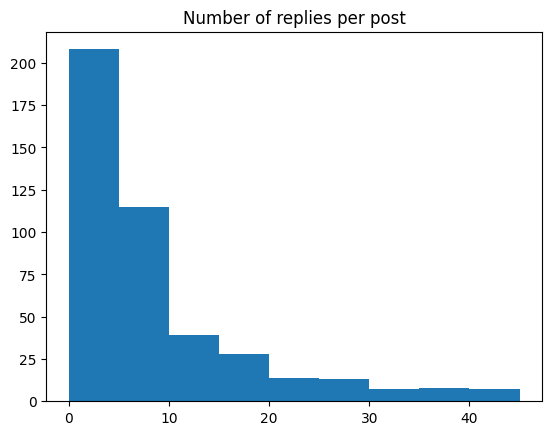

In [ ]:
from matplotlib import pyplot as plt
plt.hist(unique[2],bins = list(range(0,50,5)))
plt.title('Number of replies per post')
plt.show()

(array([4158.,    0.,    0.,    0.,    0., 4226.,    0.,    0.,    0.,
        2005.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

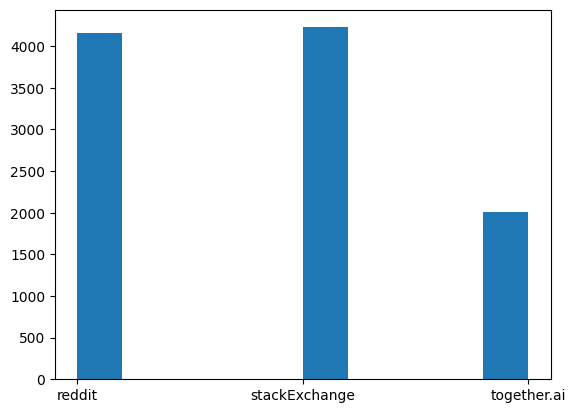

In [ ]:
plt.hist(data[:,4])


(array([1789., 1723., 1385.,    0., 1727., 1224.,    0., 1037.,  913.,
         591.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

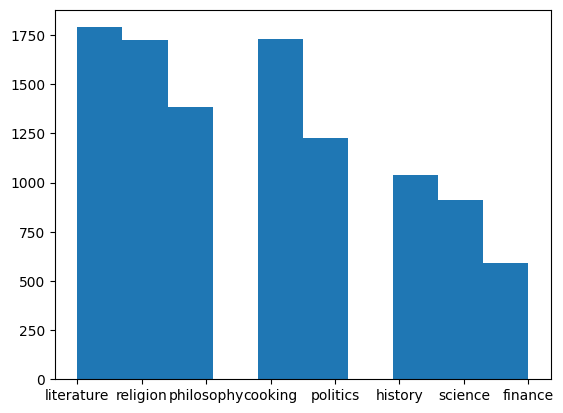

In [ ]:
plt.hist(data[:,2])


# Analyzing results

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

texts = data[:, 1].astype(str)
labels = data[:, -1]  # Extract labels assuming they are in the last column
labels[labels=='True'] = 1
labels[labels=='False'] = 0  # Convert labels to integers
labels = np.asarray(labels).astype('float32')
X_train, X_testOrigin, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(x) for x in sequences)
padded_data = pad_sequences(sequences, maxlen=max_sequence_length)
X_train, X_test, y_train, y_test = train_test_split(padded_data, labels, test_size=0.2, random_state=42)


y_pred = loaded_model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_bin = np.round(y_pred).reshape(-1)
confusion_matrix(y_test, y_bin)

array([[1568,  118],
       [ 367,   25]])

Text(0, 0.5, 'precision')

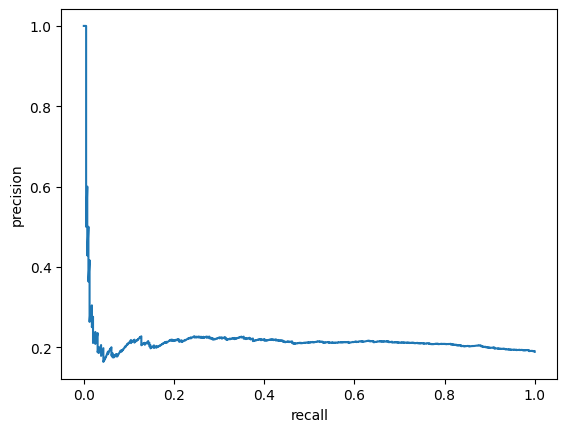

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('recall')
plt.ylabel('precision')

Text(0, 0.5, 'true positive rate')

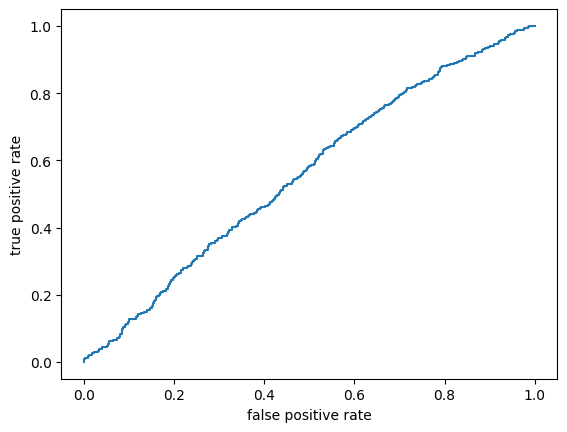

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

(1, 2078)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'cooking'),
  Text(1, 0, 'finance'),
  Text(2, 0, 'history'),
  Text(3, 0, 'literature'),
  Text(4, 0, 'philosophy'),
  Text(5, 0, 'politics'),
  Text(6, 0, 'religion'),
  Text(7, 0, 'science')])

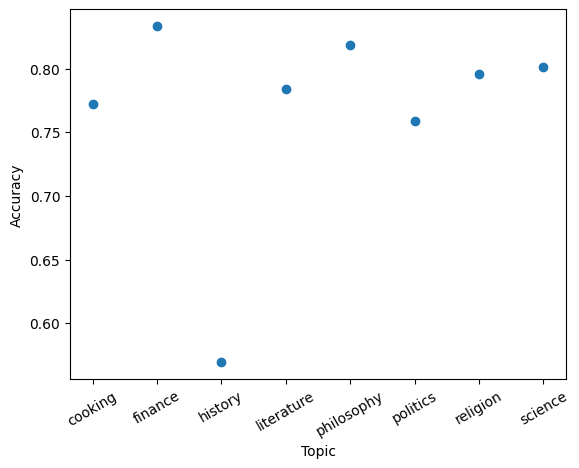

In [ ]:
y_correct = np.array([y_bin.reshape(-1) == y_test.reshape(-1)])
print(y_correct.shape)
X_train, X_testOrigin, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_testOrigin = np.hstack((X_testOrigin,y_correct.reshape(-1,1)))

topics_uni = np.unique(topics)

lst = []
for n in topics_uni:
  lst.append((n,np.mean(X_testOrigin[X_testOrigin[:,2] == n][:,6])))
plt.scatter([x[0] for x in lst],[x[1] for x in lst])
plt.ylabel('Accuracy')
plt.xlabel('Topic')
plt.xticks(rotation=30)

# Import dataset


In [ ]:
# with open('/content/drive/MyDrive/newestdata.npy', 'wb') as f:
#     np.save(f,data)

In [ ]:
from google.colab import drive
import numpy as np
import keras

drive.mount('/content/drive')

#colTitles = ['prompt','answer','topic','source','website','ai_generated']

######"############## updated dataset with together.ai and reddit texts
data = np.load('/content/drive/MyDrive/newestdata.npy',allow_pickle=True)
##################tog
loaded_model = keras.saving.load_model("/content/drive/MyDrive/model.keras")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 4227], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_6'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

# RNN architectures, attention mechanisms

In [ ]:
texts = data[:, 1].astype(str)  # Convert all text data to string, ensuring no non-string data column 1 is the response column
labels = data[:, -1]  # Extract labels assuming they are in the last column

labels[labels=='True'] = 1
labels[labels=='False'] = 0  # Convert labels to integers
labels = np.asarray(labels).astype('float32')

# Debugging step: Check unique labels
print("Unique labels:", np.unique(labels,return_counts=True))


Unique labels: (array([0., 1.], dtype=float32), array([4663,  943]))


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

texts = data[:, 1].astype(str)  # Convert all text data to string, ensuring no non-string data column 1 is the response column
labels = data[:, -1]  # Extract labels assuming they are in the last column

labels[labels=='True'] = 1
labels[labels=='False'] = 0  # Convert labels to integers
labels = np.asarray(labels).astype('float32')

# Debugging step: Check unique labels
print("Unique labels:", np.unique(labels,return_counts=True))

# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(x) for x in sequences)  # Get the maximum sequence length

# Pad sequences to ensure uniform input size
padded_data = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_data, labels, test_size=0.2, random_state=42)

# Model building: LSTM for sequence processing
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    LSTM(32, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Optionally, evaluate the model to see final metrics
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Unique labels: (array([0., 1.], dtype=float32), array([4663,  943]))
Epoch 1/25
141/141 [==============================] - 731s 5s/step - loss: 0.3705 - accuracy: 0.8640 - val_loss: 0.1849 - val_accuracy: 0.9421
Epoch 2/25
141/141 [==============================] - 755s 5s/step - loss: 0.1110 - accuracy: 0.9717 - val_loss: 0.1252 - val_accuracy: 0.9528
Epoch 3/25
141/141 [==============================] - 662s 5s/step - loss: 0.0557 - accuracy: 0.9864 - val_loss: 0.1506 - val_accuracy: 0.9590
Epoch 4/25
141/141 [==============================] - 660s 5s/step - loss: 0.0284 - accuracy: 0.9942 - val_loss: 0.1378 - val_accuracy: 0.9545
Epoch 5/25
141/141 [==============================] - 663s 5s/step - loss: 0.0127 - accuracy: 0.9980 - val_loss: 0.1421 - val_accuracy: 0.9563
Epoch 6/25
141/141 [==============================] - 665s 5s/step - loss: 0.0066 - accuracy: 0.9993 - val_loss: 0.1607 - val_accuracy: 0.9661
Epoch 7/25
141/141 [==============================] - 679s 5s/step - loss

KeyboardInterrupt: 

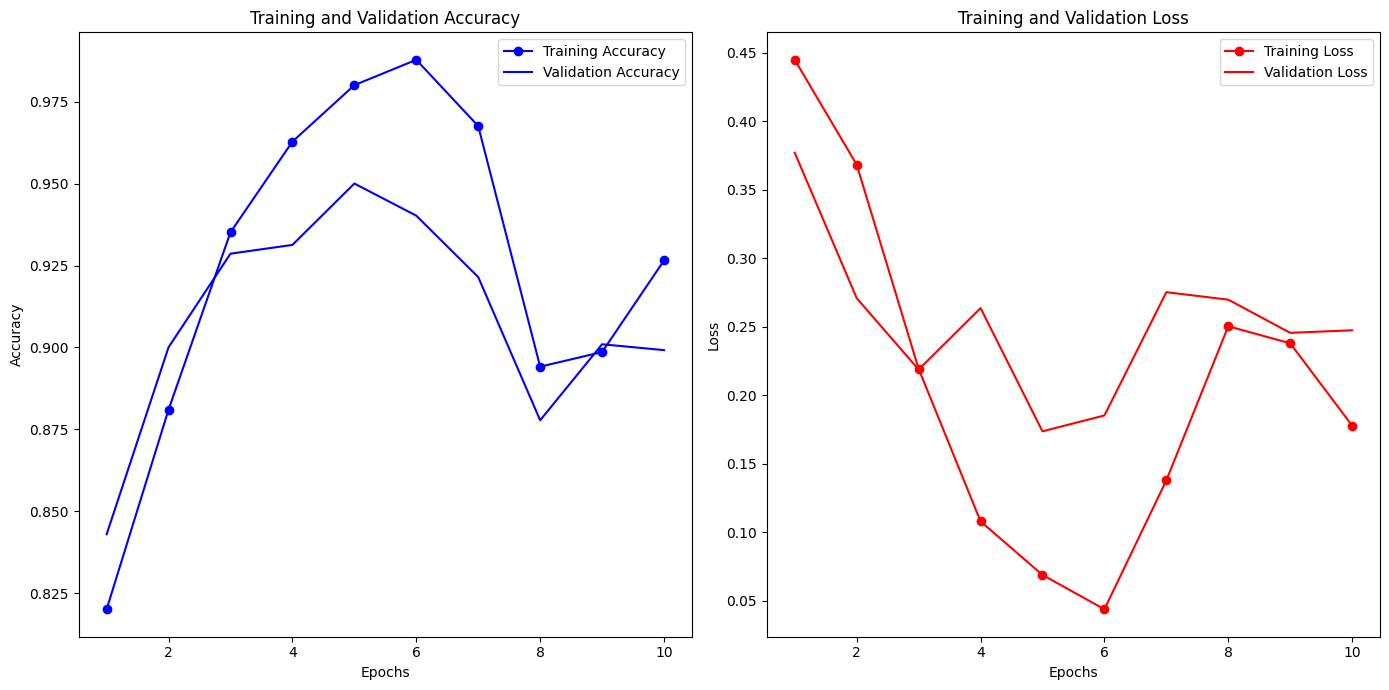

In [ ]:
import matplotlib.pyplot as plt

'''
# loss
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')


# accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
'''

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



# Cross Validation

**Using k fold cross validation for neural network model to help in estimating the performance of the model while ensuring that each data point is used for training and validation, providing a more reliable estimate of the model's performance compared to a single train-test split.**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split, KFold

# Convert text data to numerical sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
max_sequence_length = max(len(x) for x in sequences)  # Ensuring you have this value calculated
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Define K-Fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []  # Initialize a list to store scores
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Model definition
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
        LSTM(64),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    # Evaluate the model
    score = model.evaluate(X_val, y_val)
    scores.append(score[1])  # Assuming you want to keep track of accuracy

print("Cross-validation scores:", scores)


Epoch 1/10
71/71 [==============================] - 658s 9s/step - loss: 0.4084 - accuracy: 0.8501
Epoch 2/10
71/71 [==============================] - 561s 8s/step - loss: 0.1056 - accuracy: 0.9694
Epoch 3/10
71/71 [==============================] - 568s 8s/step - loss: 0.0417 - accuracy: 0.9904
Epoch 4/10
54/71 [=====================>........] - ETA: 2:30 - loss: 0.0180 - accuracy: 0.9968

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
train_loss = history.history['loss']
epochs = range(1, len(train_acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting training and validation loss
plt.plot(epochs, train_loss, 'ro-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()



**Sets up data and neural network model for classification task with text data where goal is to classify text inputs into binary classes.**

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# After reshaping
print("X_train reshaped:", X_train_reshaped.shape)
print("X_test reshaped:", X_test_reshaped.shape)

# After converting labels
print("y_train categorical shape:", y_train_cat.shape)
print("y_test categorical shape:", y_test_cat.shape)

num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



**Flattens the model to prepare the output from recurrent layers for subsequently fully connected layers.**

In [ ]:
from tensorflow.keras.layers import Reshape, Flatten

model = Sequential([
    LSTM(512, return_sequences=True, input_shape=(10, 512)),
    Flatten(),  # Flattening the output to match dimensions
    Dense(565)
])
# checking input dimensions
input_data = np.random.randn(1, 10, 512)  # Batch size 1, sequence length 10, features 512
output = model.predict(input_data)
print("Output shape:", output.shape)

import tensorflow as tf

# Example to illustrate tensor operation
tensor_a = tf.random.normal([10, 565])
tensor_b = tf.random.normal([10, 512])

tensor_b_padded = tf.pad(tensor_b, [[0, 0], [0, 53]])  # Pad tensor_b to match tensor_a's second dimension
tensor_c = tensor_a + tensor_b_padded
print("Tensor C shape:", tensor_c.shape)


**Utilizes Hugging Face Transformers library to perform sentiment analysis on Reddit comment. Leveraging pre-trained transformer based models for sentiment analysis on textual data ensuring that the input texts are appropriately tokenized and processed before analysis.**

In [ ]:
from transformers import pipeline, AutoTokenizer

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def analyze_sentiment(texts):
    truncated_texts = []
    for text in texts:
        # Encode text and truncate to the maximum length minus the space for special tokens
        tokens = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True)
        truncated_text = tokenizer.decode(tokens)
        truncated_texts.append(truncated_text)

    # Process texts through the sentiment model
    results = sentiment_model(truncated_texts)
    return results

# Example usage
reddit_data = fetch_reddit_data(["TaylorSwift"], 10)
if not reddit_data.empty:
    sentiments = analyze_sentiment(reddit_data['Comment'].tolist())
    print(sentiments)
else:
    print("No data available to analyze.")

for text in reddit_data['Comment'].tolist():
    tokens = tokenizer.encode(text, add_special_tokens=True)
    print(f"Number of tokens: {len(tokens)}")  # Ensure this number is <= 512



# LSTM

**Creating a LSTM based neural network model for binary classification tasks specifically, when dealing with text data.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

def build_lstm_model(input_dim, output_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
    model.add(LSTM(50, return_sequences=False))  # 50 LSTM units
    model.add(Dropout(0.5))  # Helps prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Binary output for classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
vocab_size = 1000  # number of unique words
embedding_dim = 32  # dimensionality of the embedding space
max_length = 100  # maximum length of input sequences

model = build_lstm_model(vocab_size, embedding_dim, max_length)
model.summary()

# Hyperparameter Tuning

<function matplotlib.pyplot.show(close=None, block=None)>

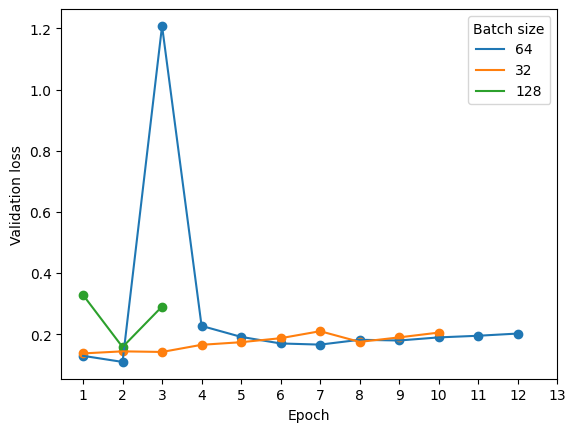

In [ ]:
from matplotlib import pyplot as plt
default = [0.1291,0.1092,1.2081,0.2270,0.1911,0.1696,0.1658,0.1816,0.1793,0.1894,0.1948,0.2020]
default = list(enumerate(default, 1))
batch32 = [0.1370,0.1438,0.1418,0.1652,0.1737,0.1868,0.2097,0.1747,0.1895,0.2051]
batch32 = list(enumerate(batch32, 1))
batch128 = [0.3284,0.1578,0.2904]
batch128 = list(enumerate(batch128, 1))

plt.scatter([x[0] for x in default],[x[1] for x in default])
plt.plot([x[0] for x in default], [x[1] for x in default], label='64')
plt.scatter([x[0] for x in batch32],[x[1] for x in batch32])
plt.plot([x[0] for x in batch32], [x[1] for x in batch32], label='32')
plt.scatter([x[0] for x in batch128],[x[1] for x in batch128])
plt.plot([x[0] for x in batch128], [x[1] for x in batch128], label='128')
plt.xticks(list(range(1,14)))
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend(title='Batch size')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

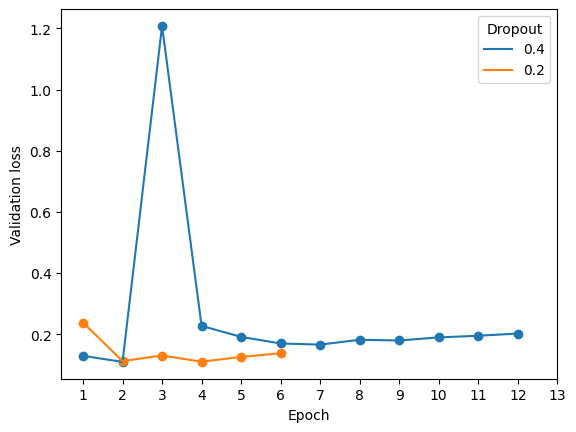

In [ ]:
default = [0.1291,0.1092,1.2081,0.2270,0.1911,0.1696,0.1658,0.1816,0.1793,0.1894,0.1948,0.2020]
default = list(enumerate(default, 1))
dropout2 = [0.2381,0.1118,0.1302,0.1100,0.1255,0.1376]
dropout2 = list(enumerate(dropout2, 1))

plt.scatter([x[0] for x in default],[x[1] for x in default])
plt.plot([x[0] for x in default], [x[1] for x in default], label='0.4')
plt.scatter([x[0] for x in dropout2],[x[1] for x in dropout2])
plt.plot([x[0] for x in dropout2], [x[1] for x in dropout2], label='0.2')
plt.xticks(list(range(1,14)))
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend(title='Dropout')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

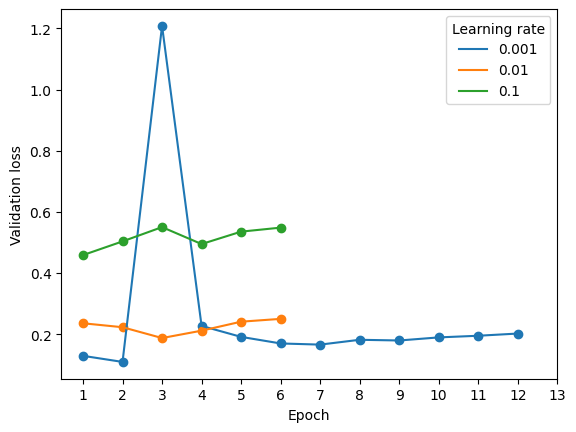

In [ ]:
default = [0.1291,0.1092,1.2081,0.2270,0.1911,0.1696,0.1658,0.1816,0.1793,0.1894,0.1948,0.2020]
default = list(enumerate(default, 1))
lr01 = [0.2356,0.2227,0.1873,0.2114,0.2408,0.2500]
lr01 = list(enumerate(lr01, 1))
lr1 = [0.4586,0.5034,0.5501,0.4947,0.5353,0.5484]
lr1 = list(enumerate(lr1, 1))

plt.scatter([x[0] for x in default],[x[1] for x in default])
plt.plot([x[0] for x in default], [x[1] for x in default], label='0.001')
plt.scatter([x[0] for x in lr01],[x[1] for x in lr01])
plt.plot([x[0] for x in lr01], [x[1] for x in lr01], label='0.01')
plt.scatter([x[0] for x in lr1],[x[1] for x in lr1])
plt.plot([x[0] for x in lr1], [x[1] for x in lr1], label='0.1')
plt.xticks(list(range(1,14)))
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend(title='Learning rate')
plt.show

# Bidirectional LSTM

**Training a Bidirectional LSTM model for text classification.**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Ensure labels are binary
assert np.all(np.unique(labels) == np.array([0, 1])), "Labels are not binary!"

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(x) for x in sequences)
padded_data = pad_sequences(sequences, maxlen=max_sequence_length)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(padded_data, labels, test_size=0.2, random_state=42)

# Model definition
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Unique labels: (array([   0,    1,    2, ..., 9979, 9985, 9987], dtype=int32), array([ 4, 26, 23, ...,  1,  1,  1]))
Epoch 1/30
71/71 [==============================] - 11s 45ms/step - loss: -4855.1260 - accuracy: 0.0049 - val_loss: -18111.3730 - val_accuracy: 0.0036
Epoch 2/30
71/71 [==============================] - 3s 36ms/step - loss: -33747.6992 - accuracy: 0.0049 - val_loss: -45509.1094 - val_accuracy: 0.0036
Epoch 3/30
71/71 [==============================] - 3s 36ms/step - loss: -52962.2383 - accuracy: 0.0049 - val_loss: -60188.5273 - val_accuracy: 0.0036
Epoch 4/30
71/71 [==============================] - 3s 40ms/step - loss: -66200.8750 - accuracy: 0.0049 - val_loss: -72656.0078 - val_accuracy: 0.0036
Epoch 5/30
71/71 [==============================] - 3s 44ms/step - loss: -78385.8516 - accuracy: 0.0049 - val_loss: -84498.8984 - val_accuracy: 0.0036
Epoch 6/30
71/71 [==============================] - 3s 42ms/step - loss: -89954.0391 - accuracy: 0.0049 - val_loss: -96047.4219 

KeyboardInterrupt: 

# GRU

**GRU is a type of RNN that introduces gating to selectively update and reset the internal state so we can capture dependencies over long sequences more effectively while addressing some of the limitations of traditional RNNs.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense

def build_gru_model(input_dim, output_dim, input_length):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        GRU(50),  # 50 GRU units
        Dropout(0.5),  # Helps prevent overfitting
        Dense(1, activation='sigmoid')  # Binary output for classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



# GRU MODEL


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, TextVectorization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Text vectorization
max_features = 10000  # Vocabulary size
max_length = 100  # Sequence length to pad the outputs to
vectorizer = TextVectorization(max_tokens=max_features, output_mode='int', output_sequence_length=max_length)
vectorizer.adapt(X_train)

# Vectorize the texts
X_train = vectorizer(X_train)
X_val = vectorizer(X_val)
X_test = vectorizer(X_test)

# One-hot encode labels if necessary
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Model building
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_length),
    GRU(128, return_sequences=False),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Model training
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 1379330 (5.26 MB)
Trainable params: 1379330 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
53/53 [==============================] - 41s 552ms/step - loss: 0.4449 - accuracy: 0.8201 - val_loss: 0.3771 - val_accuracy: 0.8430
Epoch 2

In [ ]:
# check predictions
from tensorflow.keras.backend import argmax

y_pred = model.predict(X_test)
for i in range(30):
  print(f'Label predicted: {argmax(y_pred[i]).numpy()}, Actual label: {argmax(y_test[i]).numpy()}')
  print(f'text: {texts[i]}')

36/36 [==============================] - 3s 67ms/step
Label predicted: 0, Actual label: 0
text: welcome to /r/askphilosophy! **please read [our updated rules and guidelines]( before commenting**.as of july 1 2023, /r/askphilosophy only allows answers from [panelists]( whether those answers are posted as top-level comments or replies to other comments. non-panelists can participate in subsequent discussion, but are not allowed to answer ops question(s). if you wish to learn more, or to apply to become a panelist, please see [this post](**please note:** this is a highly moderated academic q&a subreddit and not an open discussion, debate, change-my-view, or test-my-theory subreddit.*i am a bot, and this action was performed automatically. please [contact the moderators of this subreddit](/message/compose/?to=/r/askphilosophy) if you have any questions or concerns.*
Label predicted: 0, Actual label: 0
text: your confusion may be that the two words have more or less the same meaning, but *s

# BERT for fine tuning text classification task

**BERT is a pre-trained language representation model based on the Transformer architecture that learns bidrectional contextual representations of words in a sentence.**

In [ ]:
!pip install transformers
!pip install tensorflow transformers



In [ ]:
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification, InputExample, InputFeatures

texts = data[:, 1].astype(str)  # Extract texts assuming they are in the first column
labels = data[:, -1]  # Extract labels assuming they are in the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Initialize tokenizer from Hugging Face transformers
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def convert_data_to_examples(X, Y):
    """Convert data into input examples for the BERT model."""
    examples = []
    for input_text, label in zip(X, Y):
        examples.append(InputExample(guid=None, text_a=input_text, text_b=None, label=label))
    return examples

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=512):
    """Convert input examples into TensorFlow dataset of features."""
    features = []

    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,  # Truncate/pad
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )
        input_ids, attention_mask = input_dict["input_ids"], input_dict["attention_mask"]
        features.append(InputFeatures(input_ids=input_ids, attention_mask=attention_mask, label=e.label))

    def gen():
        for f in features:
            yield {"input_ids": f.input_ids, "attention_mask": f.attention_mask}, f.label

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32}, tf.int64),
        ({"input_ids": tf.TensorShape([None]), "attention_mask": tf.TensorShape([None])}, tf.TensorShape([]))
    )

# Prepare the dataset
train_examples = convert_data_to_examples(X_train, y_train)
train_dataset = convert_examples_to_tf_dataset(train_examples, tokenizer, max_length=128)  # Define max_length appropriately
train_dataset = train_dataset.shuffle(100).batch(32).repeat(2)

# Load the BERT model for sequence classification with the appropriate number of labels
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
# we will do just 1 epoch, though multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 1
# model initialization
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Fit the model
#model.fit(train_dataset, epochs=3)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x79b86913afe0>

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_data, epochs=3, steps_per_epoch=115)


# CNN

**Buidling a convolutional neural network (CNN) model for binary classification tasks specifically for text data.**



In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, Dense
from tensorflow.keras.models import Sequential

def create_cnn_model(vocab_size, embedding_dim, input_length):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=input_length),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


**Follows a standard workflow for text classification tasks (tokenization, data preparation, model creation, and training).**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=100)  # Assuming maxlen of 100 for demonstration

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = create_cnn_model(vocab_size=10000, embedding_dim=100, input_length=100)
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


AttributeError: 'numpy.int64' object has no attribute 'lower'

# Sequence to Sequence models

**Commonly used in tasks like machine translation or sequence generation.**

In [ ]:
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed

def create_seq2seq_model(input_dim, output_dim, max_text_length):
    model = Sequential([
        LSTM(100, input_shape=(max_text_length, input_dim), return_sequences=False),
        RepeatVector(max_text_length),
        LSTM(100, return_sequences=True),
        TimeDistributed(Dense(output_dim, activation='softmax'))
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Adding data augmentation techniques for text to enhance model robustness

**Replace words in sentences with synonyms to create new trianing examples.**

In [ ]:
import nltk
from nltk.corpus import wordnet
import random

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in nltk.corpus.stopwords.words('english')]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break

    sentence = ' '.join(new_words)
    return sentence

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalpha() or char == ' '])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Example usage
original_sentence = "The quick brown fox jumps over the lazy dog"
augmented_sentence = synonym_replacement(original_sentence, 2)
print("Original:", original_sentence)
print("Augmented:", augmented_sentence)


**Back Translation - translate text to another language and then back to the original language.**

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
import torch

def back_translate(sentence, model_name='Helsinki-NLP/opus-mt-en-ROMANCE'):
    # Load the tokenizer and model for English to Romance language translation
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    # Translate from English to a Romance language (like French)
    translated = translate(sentence, model, tokenizer, language="fr")

    # Translate from Romance language back to English
    back_translated = translate(translated, model, tokenizer, language="en")
    return back_translated

def translate(text, model, tokenizer, language):
    # Prepare the text data into appropriate format for the model
    template = f">>{language}<< {{}}"
    text = template.format(text)
    encoded = tokenizer.encode(text, return_tensors="pt", add_special_tokens=True)

    # Generate translation using the model
    translated = model.generate(encoded, max_length=100, num_beams=5, early_stopping=True)
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)
    return translated_text



In [ ]:
import numpy as np
exchange = [('cooking','cooking'),('philosophy','philosophy'),('history','history'),('mythology','literature'),('literature','literature'),('writing','literature'),('ebooks','literature'),
 ('worldbuilding','literature'),('politics','politics'),('buddhism','religion'),('hinduism','religion'),('islam','religion'),('christianity','religion'),('physics','science'),('biology','science'),
('chemistry','science'),('psychology','science'),('astronomy','science'),('money','finance'),('quant','finance')]

#colTitles = ['prompt','answer','topic','source','website','ai_generated']
stackData = np.array([], dtype=object).reshape(0,6)

print(list(x[1] for x in exchange))
uniqueExchange = np.unique(np.array(list(x[1] for x in exchange)),return_counts=True)
freqExchange = dict(zip(uniqueExchange[0],uniqueExchange[1]))
freqExchange

import requests
import os
import time
from bs4 import BeautifulSoup
import json


lim = 40
for x in range(17,20):


    startQ = 1
    if x == 1:
        startQ = 90
    for n in range(startQ,int(lim/(freqExchange[exchange[x][1]]))):
        if n%5==0:
            print(x,n)
        r=requests.get("https://" + exchange[x][0] + ".stackexchange.com/questions/"+str(n))
        soup=BeautifulSoup(r.content, 'html.parser')
        l=soup.find_all("title")
        m=soup.find_all("div", "s-prose js-post-body")
        title=l[0].tex
        if m==[] or len(m)==1:
            print(l,m)
            pass
        else:
            answer=m[1].text
            if title is not None and "Page not found - Stack Overflow" in title:
                print(l,m,m)
                pass
            else:
                for i in range(1,len(m)):
                    entry = np.array([[title, m[i].text, exchange[x][1], exchange[x][0], 'stackExchange', False]])
                    stackData = np.vstack((stackData, entry))

                time.sleep(7)

['cooking', 'philosophy', 'history', 'literature', 'literature', 'literature', 'literature', 'literature', 'politics', 'religion', 'religion', 'religion', 'religion', 'science', 'science', 'science', 'science', 'science', 'finance', 'finance']
18 10
[<title>Page not found - Personal Finance &amp; Money Stack Exchange</title>] []
[<title>Page not found - Personal Finance &amp; Money Stack Exchange</title>] []
[<title>Page not found - Personal Finance &amp; Money Stack Exchange</title>] []
[<title>Page not found - Personal Finance &amp; Money Stack Exchange</title>] []
[<title>Page not found - Personal Finance &amp; Money Stack Exchange</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just

In [ ]:
import numpy as np
exchange = [('cooking','cooking'),('philosophy','philosophy'),('history','history'),('mythology','literature'),('literature','literature'),('writing','literature'),('ebooks','literature'),
 ('worldbuilding','literature'),('politics','politics'),('buddhism','religion'),('hinduism','religion'),('islam','religion'),('christianity','religion'),('physics','science'),('biology','science'),
('chemistry','science'),('psychology','science'),('astronomy','science'),('money','finance'),('quant','finance')]

#colTitles = ['prompt','answer','topic','source','website','ai_generated']
stackData = np.array([], dtype=object).reshape(0,6)

print(list(x[1] for x in exchange))
uniqueExchange = np.unique(np.array(list(x[1] for x in exchange)),return_counts=True)
freqExchange = dict(zip(uniqueExchange[0],uniqueExchange[1]))
freqExchange

import requests
import os
import time
from bs4 import BeautifulSoup
import json


lim = 40
for x in range(15,18):
    startQ = 1
    if x == 1:
        startQ = 90
    for n in range(startQ,int(lim/(freqExchange[exchange[x][1]]))):
        if n%5==0:
            print(x,n)
        r=requests.get("https://" + exchange[x][0] + ".stackexchange.com/questions/"+str(n))
        soup=BeautifulSoup(r.content, 'html.parser')
        l=soup.find_all("title")
        m=soup.find_all("div", "s-prose js-post-body")
        title=l[0].text
        if m==[] or len(m)==1:
            print(l,m)
            pass
        else:
            answer=m[1].text
            if "Page not found - Stack Overflow" in title:
                print(l,m,m)
                pass
            else:
                for i in range(1,len(m)):
                    entry = np.array([[title, m[i].text, exchange[x][1], exchange[x][0],  'stackExchange', False]])
                    stackData = np.vstack((stackData, entry))

        time.sleep(7)


['cooking', 'philosophy', 'history', 'literature', 'literature', 'literature', 'literature', 'literature', 'politics', 'religion', 'religion', 'religion', 'religion', 'science', 'science', 'science', 'science', 'science', 'finance', 'finance']
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
15 5
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
16 5
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
17 5
[<title>Just a moment...</title>] []
[<title>Just a moment...</title>] []
[